<a href="https://colab.research.google.com/github/Divam-bot/Flow-Mobility/blob/main/Basic_fare_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_excel("/content/fare_data_2.xlsx")
dataset.head()

,date,fare
0,1990-01-01,678
1,1990-01-02,809
2,1990-01-03,744
3,1990-01-04,795
4,1990-01-05,755


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10999 non-null  datetime64[ns]
 1   fare    10999 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 172.0 KB


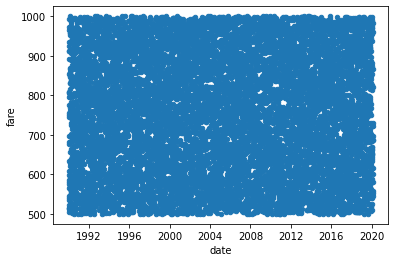

In [4]:
dataset.plot(kind="scatter",x="date",y="fare")

In [5]:
dataset['date'] = pd.to_datetime(dataset['date'])


splitting the date into day,month,year colums further converting date in integers by converting in ordinals and subtracting lowest date ordinal


In [6]:
dataset["year"] = dataset['date'].dt.year
dataset["month"] = dataset['date'].dt.month
dataset["day"] = dataset['date'].dt.day
dataset["date_ord"]=dataset['date'].apply(lambda x: x.toordinal()-726468)
dataset.head()

,date,fare,year,month,day,date_ord
0,1990-01-01,678,1990,1,1,0
1,1990-01-02,809,1990,1,2,1
2,1990-01-03,744,1990,1,3,2
3,1990-01-04,795,1990,1,4,3
4,1990-01-05,755,1990,1,5,4


In [7]:
x = dataset.iloc[:,5]
x.head()

0    0
1    1
2    2
3    3
4    4
Name: date_ord, dtype: int64

In [8]:
y = dataset.iloc[:,1]
y.head()

0    678
1    809
2    744
3    795
4    755
Name: fare, dtype: int64

Let's Observe date_ord versus fare graph

(0.0, 10.0)

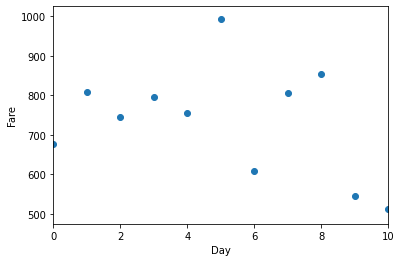

In [9]:
plt.scatter(x,y)
plt.xlabel("Day")
plt.ylabel("Fare")
plt.xlim(0,10)

Before Training the model lets split this data set into 70:20:10 split of train validate test sets.

for that first divide set into 70:30 and then rem. 30 in 20 and 10


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x.values, y.values, test_size = 0.3, random_state = 0)

x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size = 0.333, random_state = 0)
x_train.shape

(7699,)

In [24]:
'''
x_train = x_train[:10]
y_train = y_train[:10]
x_valid = x_valid[11:21]
y_valid = y_valid[11:21]
'''

'\nx_train = x_train[:10]\ny_train = y_train[:10]\nx_valid = x_valid[11:21]\ny_valid = y_valid[11:21]\n'

Checking the info of our newly splitted sets.

In [37]:
print(x_train.shape,
x_valid.shape,
x_test.shape,

y_train.shape,
y_valid.shape,
y_test.shape)

(7699, 1) (2201, 1) (1099,) (7699, 1) (2201,) (1099, 1)


Training a simple linear regression model on this dataset.

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

before fitting we need to convert our 1d data array into 2d as sklearn standards.


In [39]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x_valid = x_valid.reshape(-1,1)

x_train.shape

(7699, 1)

In [40]:
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:

y_pred = reg.predict(x_valid)
print(y_pred,x_valid)

[[748.23363455]
 [747.53968627]
 [747.88004864]
 ...
 [747.39566469]
 [746.97883577]
 [747.95119702]] [[9042]
 [4214]
 [6582]
 ...
 [3212]
 [ 312]
 [7077]]


Text(0, 0.5, 'fare')

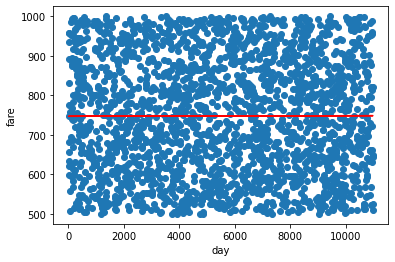

In [52]:
plt.scatter(x_valid,y_valid)
plt.plot(x_valid,y_pred,'r')
plt.xlabel("day")
plt.ylabel("fare")
#plt.xlim(7700,7710)

Lets try and build logistic regression model on the same data.


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logreg = LogisticRegression()

In [46]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = logreg.predict(x_valid)
print(y_pred,x_valid)

[621 621 621 ... 621 621 621] [[9042]
 [4214]
 [6582]
 ...
 [3212]
 [ 312]
 [7077]]


Text(0, 0.5, 'fare')

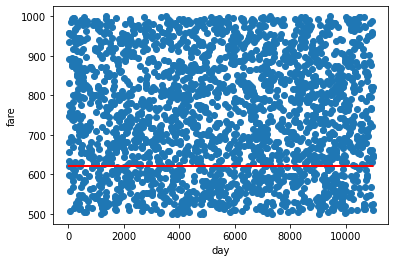

In [48]:
plt.scatter(x_valid,y_valid)
plt.plot(x_valid,y_pred,'r')
plt.xlabel("day")
plt.ylabel("fare")
#plt.xlim(7700,7710)

Lets check accuracy of the model


In [49]:
accuracy_score(y_valid,y_pred)

0.0013630168105406633